In [13]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Setup environment and update dictionary
!source setup_project.sh

# Set options
pd.set_option("display.max_rows", 200)

Rebel manifesto dictionary updated.


In [14]:
# Load rebel manifesto data
manifesto_dictionary = pd.read_pickle('../data/manifesto_dictionary.pkl')
manifesto_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 780 to 900
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        901 non-null    object        
 1   group          901 non-null    object        
 2   date           841 non-null    datetime64[ns]
 3   year           841 non-null    period[A-DEC] 
 4   source_type    901 non-null    object        
 5   document_type  893 non-null    object        
 6   description    875 non-null    object        
 7   author         85 non-null     object        
 8   language       901 non-null    object        
 9   file_path      901 non-null    object        
 10  file_name      901 non-null    object        
 11  file_type      901 non-null    object        
dtypes: datetime64[ns](1), object(10), period[A-DEC](1)
memory usage: 91.5+ KB


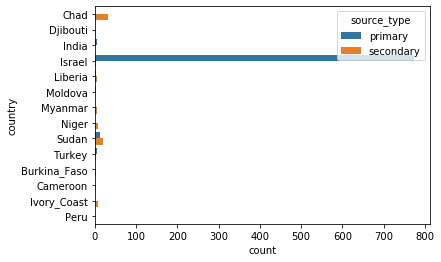

In [15]:
# Exploratory plots
blue = sns.color_palette('tab10')[0]
orange = sns.color_palette('tab10')[1]

# Sources by country
sns.countplot(y='country', hue='source_type', data=manifesto_dictionary)

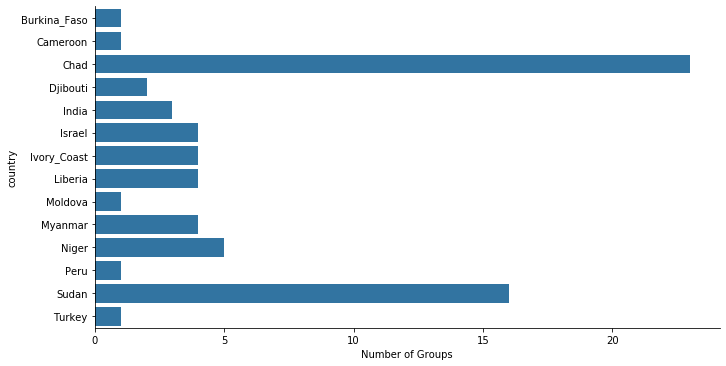

In [16]:
# Number of groups by country
cgs_counts = manifesto_dictionary.groupby(['country'])['group'].nunique()
cgs_counts = cgs_counts.to_frame(name='Number of Groups').reset_index()
sns.catplot(x='Number of Groups', y='country', data=cgs_counts,
            kind='bar', color=blue, aspect=2)

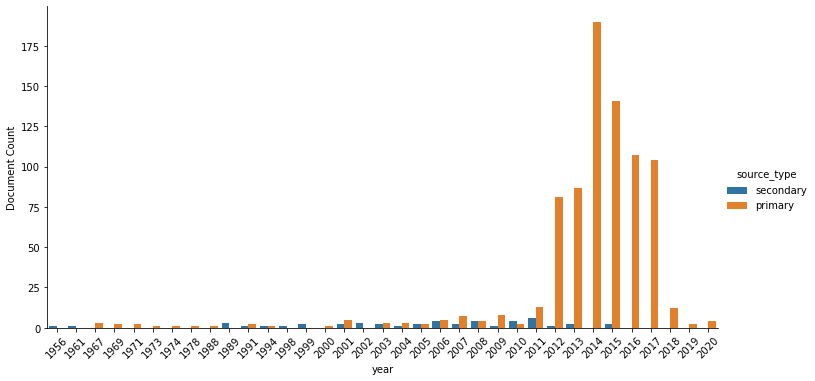

In [17]:
sy_counts = manifesto_dictionary.groupby(['year'])['source_type'].value_counts()
sy_counts = sy_counts.to_frame(name='Document Count').reset_index()
g = sns.catplot(x='year', y='Document Count', hue='source_type', 
                kind='bar', data=sy_counts, aspect=2)
g.set_xticklabels(rotation=45)

In [18]:
# Examine language and primary counts for subset of groups
is_primary = manifesto_dictionary['source_type'] == 'primary'
manifesto_dictionary[is_primary]

,country,group,date,year,source_type,document_type,description,author,language,file_path,file_name,file_type
780,Chad,CNR,2005-11-30,2005,primary,interview,NaN,NaN,EN,Chad/CNR/primary/None_interview_2005-11-30.docx,None_interview_2005-11-30.docx,docx
800,Djibouti,FRUD-AD,2001-05-12,2001,primary,agreement,AgreementForReformCivilConcord,NaN,EN,Djibouti/FRUD-AD/primary/AgreementForReformCiv...,AgreementForReformCivilConcord_agreement_2001-...,pdf
782,India,CPI-Maoist,NaT,NaT,primary,pamphlet,MLM,NaN,EN,India/CPI-Maoist/primary/MLM_pamphlet.pdf,MLM_pamphlet.pdf,pdf
783,India,CPI-Maoist,NaT,NaT,primary,constitution,Constitution,NaN,EN,India/CPI-Maoist/primary/Constitution_constitu...,Constitution_constitution.docx,docx
784,India,CPI-Maoist,2004-09-21,2004,primary,pamphlet,Programme,NaN,EN,India/CPI-Maoist/primary/Programme_pamphlet_20...,Programme_pamphlet_2004-09-21.pdf,pdf
...,...,...,...,...,...,...,...,...,...,...,...,...
801,Turkey,PKK,NaT,NaT,primary,chronology,Chronology,NaN,TR,Turkey/PKK/primary/Chronology_chronology_[TR].pdf,Chronology_chronology_[TR].pdf,pdf
802,Turkey,PKK,NaT,NaT,primary,manifesto,Manifesto,NaN,TR,Turkey/PKK/primary/Manifesto_manifesto_[TR].pdf,Manifesto_manifesto_[TR].pdf,pdf
803,Turkey,PKK,NaT,NaT,primary,article,4.1,NaN,TR,Turkey/PKK/primary/4.1_article_[TR].pdf,4.1_article_[TR].pdf,pdf
804,Turkey,PKK,1991-05-15,1991,primary,article,Kongre,NaN,TR,Turkey/PKK/primary/Kongre_article_[TR]_1991-05...,Kongre_article_[TR]_1991-05-15.pdf,pdf


In [19]:
groups = manifesto_dictionary['group'].isin(['CPI-Maoist', 'PFLP', 'PMR', 'JEM'])
manifesto_dictionary[is_primary & groups]

,country,group,date,year,source_type,document_type,description,author,language,file_path,file_name,file_type
782,India,CPI-Maoist,NaT,NaT,primary,pamphlet,MLM,NaN,EN,India/CPI-Maoist/primary/MLM_pamphlet.pdf,MLM_pamphlet.pdf,pdf
783,India,CPI-Maoist,NaT,NaT,primary,constitution,Constitution,NaN,EN,India/CPI-Maoist/primary/Constitution_constitu...,Constitution_constitution.docx,docx
784,India,CPI-Maoist,2004-09-21,2004,primary,pamphlet,Programme,NaN,EN,India/CPI-Maoist/primary/Programme_pamphlet_20...,Programme_pamphlet_2004-09-21.pdf,pdf
785,India,CPI-Maoist,2004-09-21,2004,primary,pamphlet,PoliticalResolution,NaN,EN,India/CPI-Maoist/primary/PoliticalResolution_p...,PoliticalResolution_pamphlet_2004-09-21.pdf,pdf
786,India,CPI-Maoist,2004-09-21,2004,primary,pamphlet,StrategyTactics,NaN,EN,India/CPI-Maoist/primary/StrategyTactics_pamph...,StrategyTactics_pamphlet_2004-09-21.pdf,pdf
...,...,...,...,...,...,...,...,...,...,...,...,...
0,Moldova,PMR,2011-08-06,2011,primary,constitution,Constitution,NaN,RU,Moldova/PMR/primary/Constitution_constitution_...,Constitution_constitution_[RU]_2011-08-06.docx,docx
1,Moldova,PMR,1991-08-25,1991,primary,declaration,DeclarationOfIndependence,NaN,RU,Moldova/PMR/primary/DeclarationOfIndependence_...,DeclarationOfIndependence_declaration_[RU]_199...,docx
788,Sudan,JEM,2014-07-31,2014,primary,about,About,NaN,EN,Sudan/JEM/primary/About_about_2014-07-31.pdf,About_about_2014-07-31.pdf,pdf
789,Sudan,JEM,NaT,NaT,primary,charter,TheNewDawnCharter,NaN,EN,Sudan/JEM/primary/TheNewDawnCharter_charter.pdf,TheNewDawnCharter_charter.pdf,pdf
